# Lab: Scaling on CPU and GPU

Welcome to the lab, first we wanna make sure we are on TensorFlow 2.x

Please start with 1 vCPU and then use 2, 4, 8 and 16 (and optionally 1 or 2 GPUs)

Note down execution times and compute/plot scale up factor

In [ ]:
!pip install tensorflow==2.2.0

In [ ]:
import tensorflow as tf
import time
import numpy as np
print(tf.__version__)



from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ == '2.2.0':
    printmd('<<<<<!!!!! Please install TensorFlow 2.2.0 and PLEASE RESTART the jupyter kernel using the menue above !!!!!>>>>>')



Let's check out if there are GPUs available

In [ ]:
if len(tf.config.experimental.list_physical_devices('GPU')) > 0:
    print('GPUs found, this will be fun!')

Let's create some data (e.g. two random matrices of shape 10000x10000)

In [ ]:
size = 10000
a = tf.random.uniform(shape=[size,size])
b = tf.random.uniform(shape=[size,size])

Let's multiply them together and measure time (execute the following cell at least 3 times and take the minimum to account for cache misses). Please run this notebook in different runtimes configurations to get the execution times.

To change the execution environment configuration please click on the 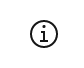 symbol within Watson Studio. In the "Environment" tab you can choose and change the "Environment definition".

We recommend that you go the the "Environment" tab in the Watson Studio Project settings and create the environments first 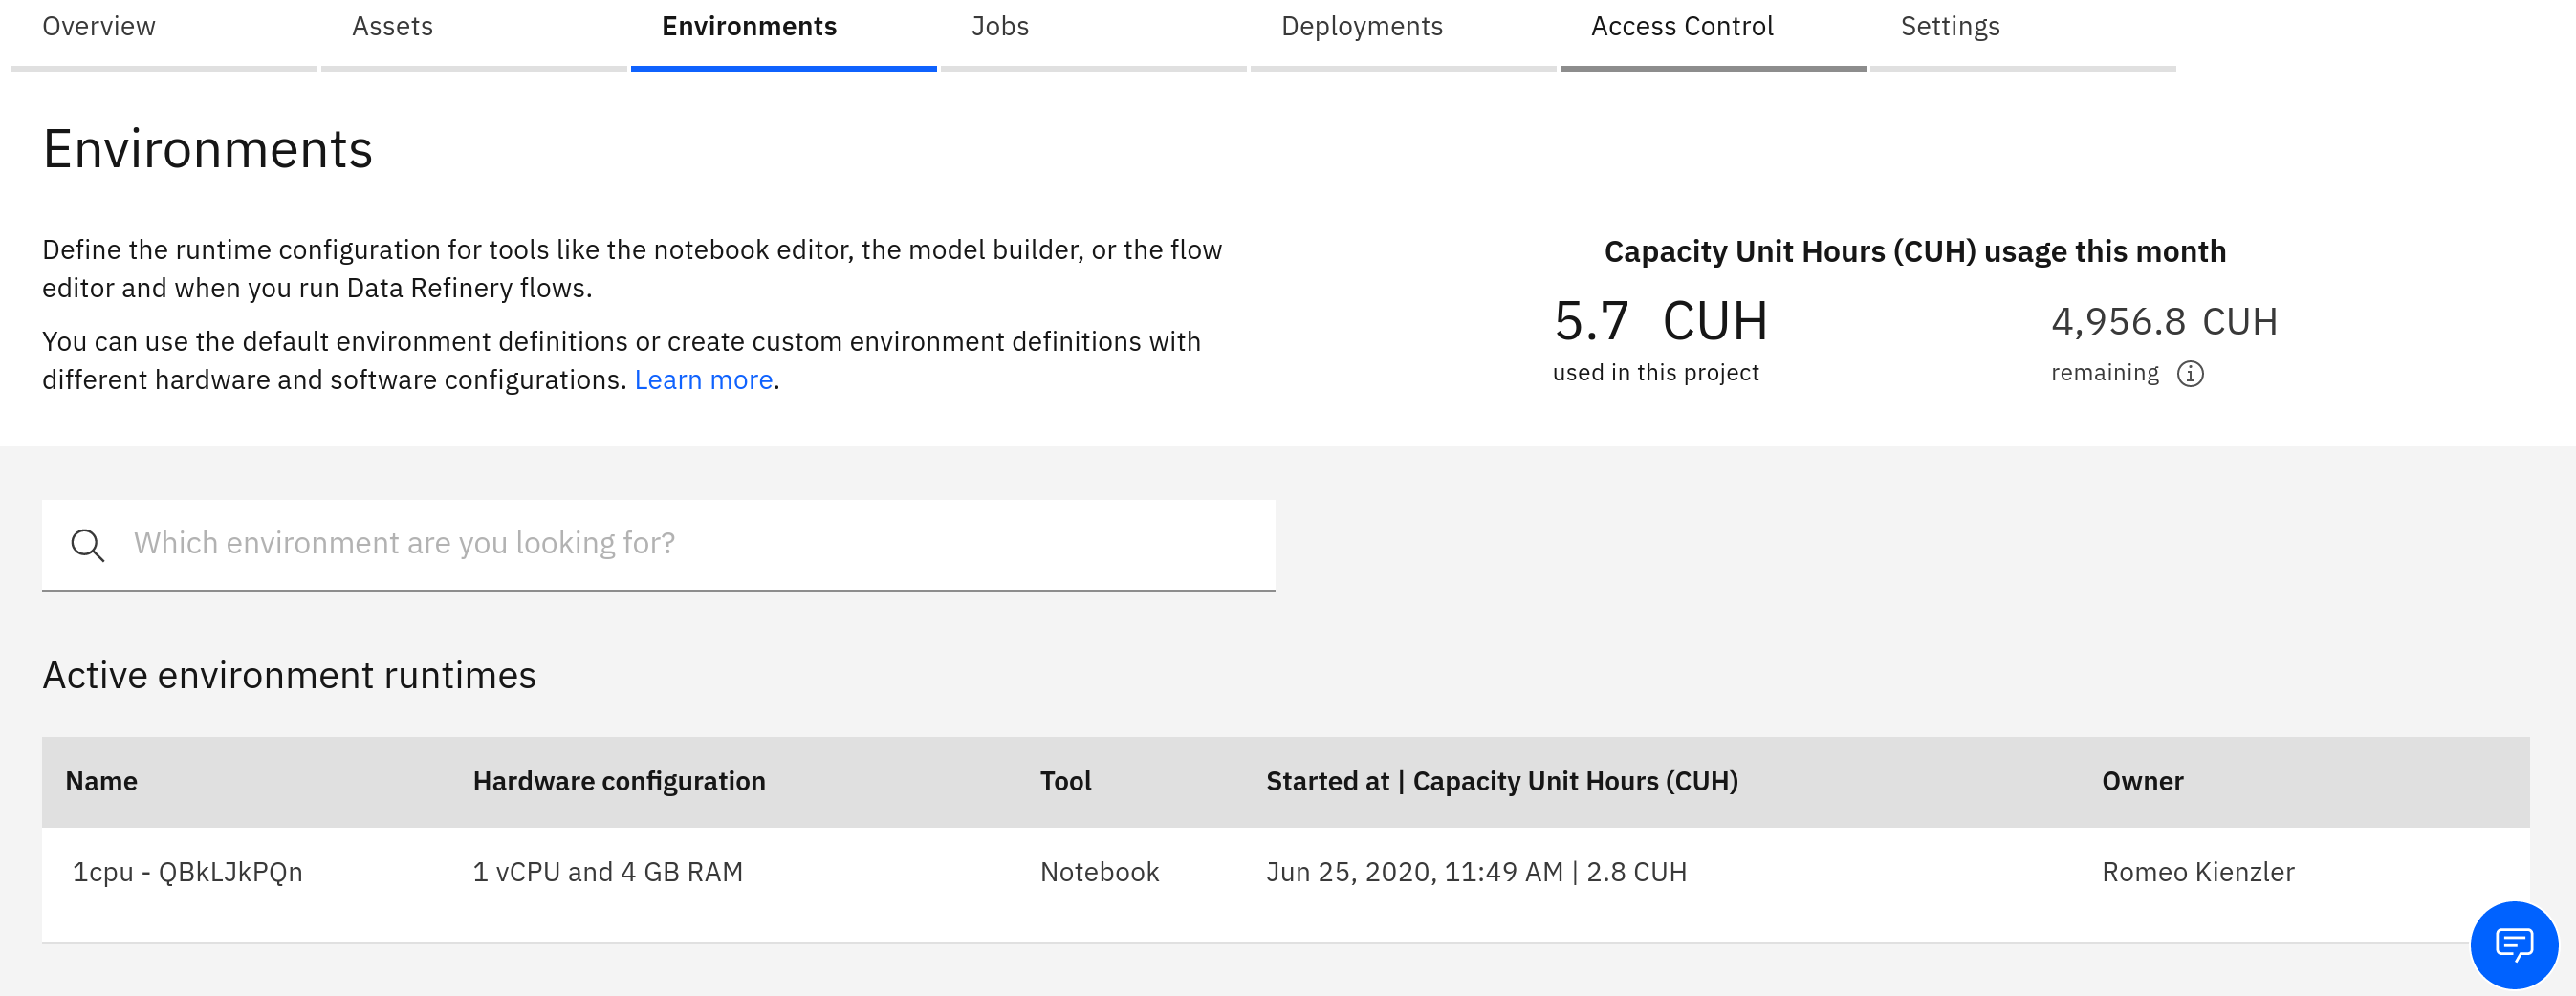

Once done, it should look similar to this
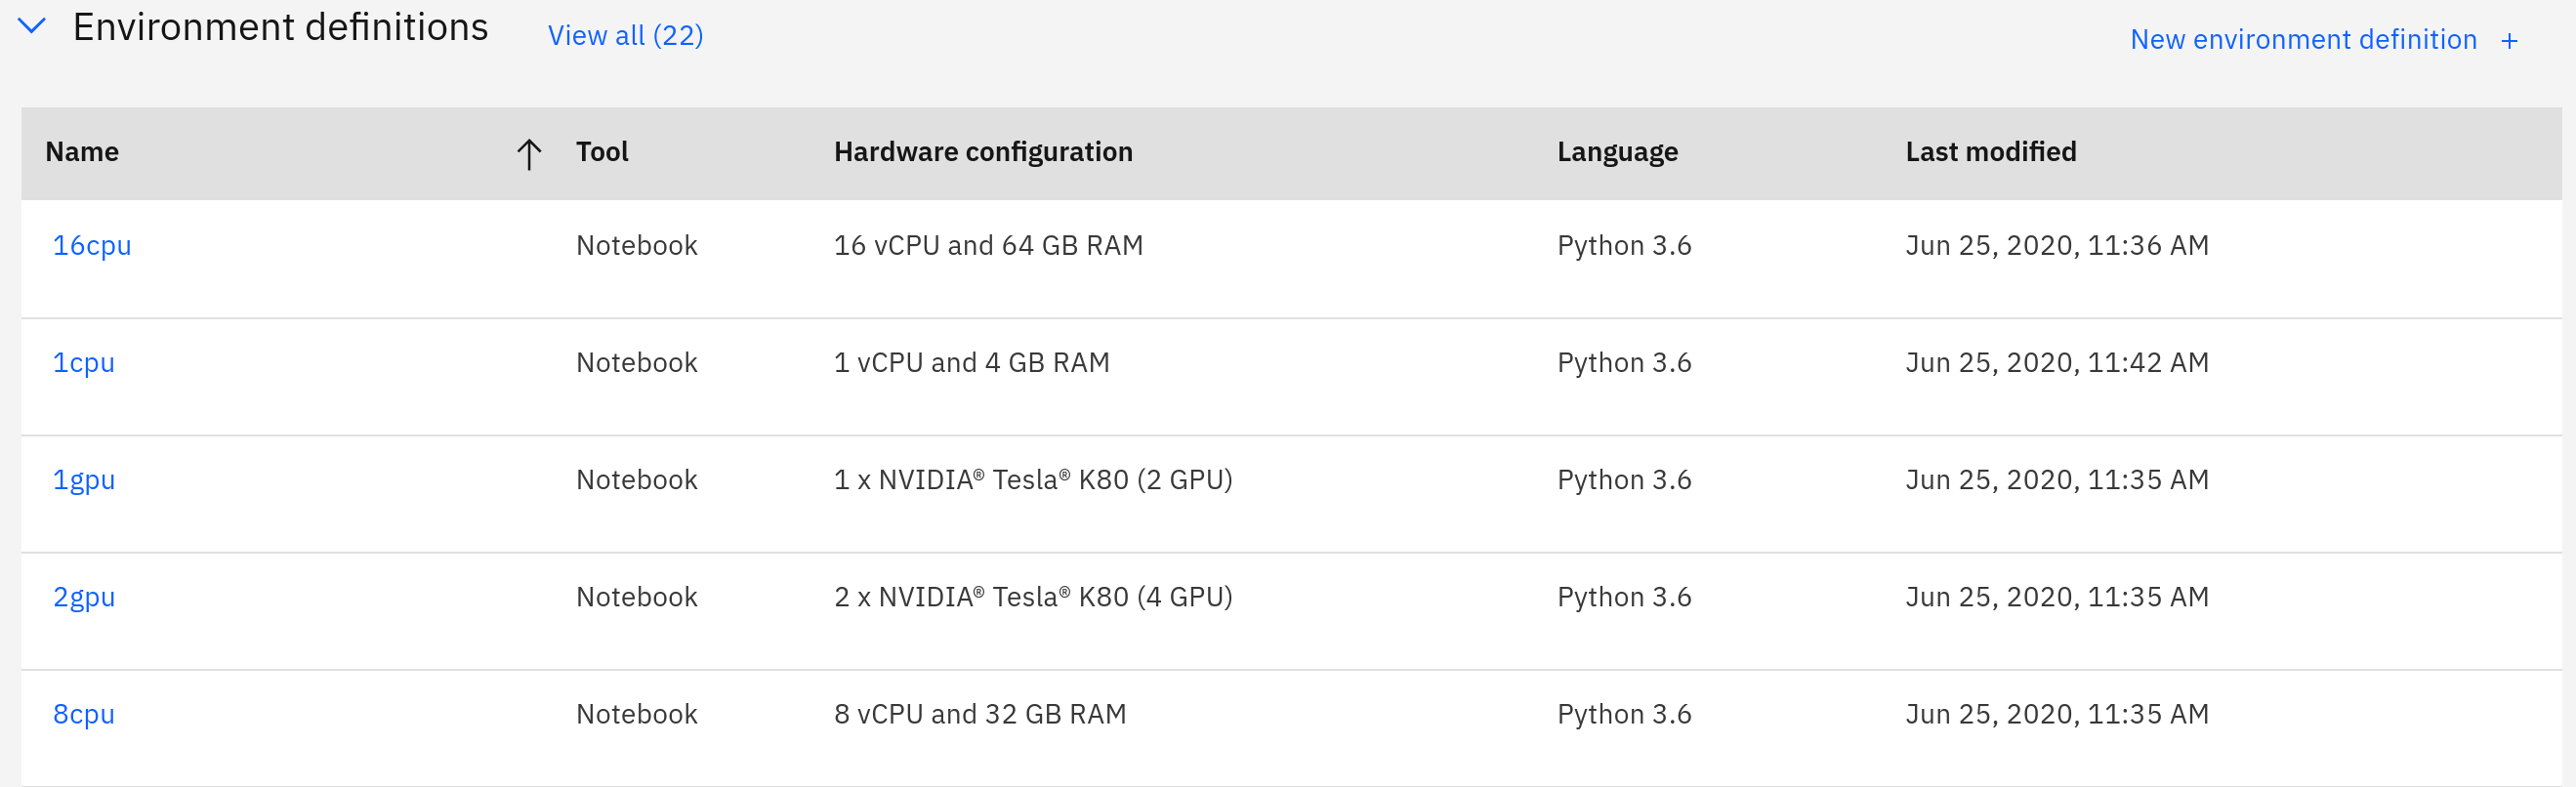

In [ ]:
start = time.time()
c = tf.matmul(a,b)
print(time.time()-start)

Please update the execution times below for the different runtime configurations with your values (1,2,4,8,16 CPU, optional 1,2,4 GPU)

In [ ]:
execution_times_cpu = {
    'cpu_1x' : 35.3118622303009,
    'cpu_2x' : 15.228885173797607,
    'cpu_4x' : 10.392901182174683,
    'cpu_8x' : 6.591029644012451,
    'cpu_16x' : 2.9781200885772705  
}
execution_times_cpu

In [ ]:
execution_times_gpu = {
    'gpu_1x' : 0.0012249946594238281,
    'gpu_2x' : 0.0007076263427734375,
    'gpu_4x' : 0.0006804466247558594   
}
execution_times_gpu

Merge CPU and GPU results

In [ ]:
execution_times_cpu_gpu = {}
execution_times_cpu_gpu.update(execution_times_cpu)
execution_times_cpu_gpu.update(execution_times_gpu)
execution_times_cpu_gpu

Compute normalized speedup factors for CPU, GPU and combindes runs

In [ ]:
max_time_cpu = np.max(list(execution_times_cpu.values()))
max_time_gpu = np.max(list(execution_times_gpu.values()))
max_time_cpu_gpu = np.max(list(execution_times_cpu_gpu.values()))

In [ ]:
execution_times_norm_cpu = np.array(1)/(np.array(list(execution_times_cpu.values()))/max_time_cpu)
execution_times_norm_gpu = np.array(1)/(np.array(list(execution_times_gpu.values()))/max_time_gpu)
execution_times_norm_cpu_gpu = np.array(1)/(np.array(list(execution_times_cpu_gpu.values()))/max_time_cpu_gpu)

Plot the results

In [ ]:
%matplotlib inline
import seaborn as sns
sns.barplot(x=np.array(list(execution_times_cpu.keys())), y=execution_times_norm_cpu).set(ylabel='speedup')

In [ ]:
sns.barplot(x=np.array(list(execution_times_gpu.keys())), y=execution_times_norm_gpu).set(ylabel='speedup')

In [ ]:
sns.barplot(x=np.array(list(execution_times_cpu_gpu.keys())), y=execution_times_norm_cpu_gpu).set(ylabel='speedup')

As you can clearly see going from a single CPU core to a single GPU gives us a speedup of more than four orders of magnitude. So large scale deep learning network training has to be done on GPUs if possible